In [133]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# settings
pd.set_option('display.max_columns', 500)


In [95]:
fec_2020 = pd.read_csv('../data/Data Science_Technical_FEC_Committee_Data_2020.csv')
fec_2020.head()

,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id
0,2020,C00745828,JAWAD AGADIR FOR PRESIDENT,"CEO, CEO",3 JAWAD ROAD,NaN,JAWAD TOWN,IN,13337,U,U,NaN,Q,NaN,NONE,NaN
1,2020,C00755884,THE SAVIOR OF MEN,"SOLOMON, DEANDRE LAMONT SOLOMON",16728 BILTMORE,NaN,DETROIT,MI,48235,P,P,IND,Q,NaN,NONE,P00017111
2,2020,C00756072,PLEASE MAKE TURTLE ISLAND A COUNCIL OF SACRED ...,"GUMP, BRANDY MARIE MS.",58 OLD LEICESTER,NaN,ASHEVILLE,NC,28804,U,N,NaN,Q,NaN,NONE,NaN
3,2020,C00756346,FRIENDS OF BETSY PAULINE ELGAR COMMITTEE,BETSY PAULINE ELGAR,8914 VETERANS DRIVE SW STE A,NaN,LAKEWOOD,WA,98498,P,P,CON,Q,NaN,BETSY PAULINE ELGAR REAL ESTATES,P20003851
4,2020,C00751628,GEORGE WASHINGTON 2020,"LEE, DONNIE GRAY",3200 MT VERNON MEMORIAL HWY,NaN,MT VERNON,VA,22121,P,P,IND,Q,NaN,NONE,NaN


In [96]:
df = pd.read_csv('../data/Data_Science_Technical_FEC_Filing_Sample.csv')
df.head()

,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_state,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,AZ,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526)
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,GA,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948)
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,WA,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,IL,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006..."
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,IL,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948)


In [6]:
fec_2020.query('cmte_nm == "ACTBLUE"').head()

,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id
10340,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN


In [7]:
fec_2020.query('cmte_nm == "ACTBLUE"')

,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id
10340,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN


In [31]:
df.filer_committee_id_number.value_counts()

filer_committee_id_number
C00401224    400000
Name: count, dtype: int64

In [32]:
fec_2020.cmte_id.value_counts()

cmte_id
C00745828    1
C00671214    1
C00635516    1
C00634253    1
C00632869    1
            ..
C00741512    1
C00722355    1
C00723007    1
C00723668    1
C90020579    1
Name: count, Length: 18323, dtype: int64

In [97]:
# join both datasets together
data = pd.merge(df, fec_2020, left_on='filer_committee_id_number', right_on='cmte_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fec_report_id                 400000 non-null  int64  
 1   date_report_received          400000 non-null  object 
 2   form_type                     400000 non-null  object 
 3   filer_committee_id_number     400000 non-null  object 
 4   transaction_id                400000 non-null  object 
 5   entity_type                   400000 non-null  object 
 6   contributor_last_name         399981 non-null  object 
 7   contributor_first_name        399996 non-null  object 
 8   contributor_street_1          400000 non-null  object 
 9   contributor_city              399999 non-null  object 
 10  contributor_state             400000 non-null  object 
 11  contributor_zip_code          400000 non-null  object 
 12  contribution_date             400000 non-nul

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fec_report_id                 400000 non-null  int64  
 1   date_report_received          400000 non-null  object 
 2   form_type                     400000 non-null  object 
 3   filer_committee_id_number     400000 non-null  object 
 4   transaction_id                400000 non-null  object 
 5   entity_type                   400000 non-null  object 
 6   contributor_last_name         399981 non-null  object 
 7   contributor_first_name        399996 non-null  object 
 8   contributor_street_1          400000 non-null  object 
 9   contributor_city              399999 non-null  object 
 10  contributor_state             400000 non-null  object 
 11  contributor_zip_code          400000 non-null  object 
 12  contribution_date             400000 non-nul

In [28]:
df.filer_committee_id_number.value_counts()

filer_committee_id_number
C00401224    400000
Name: count, dtype: int64

In [14]:
df.form_type.value_counts()

form_type
SA11AI    400000
Name: count, dtype: int64

In [10]:
fec_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18323 entries, 0 to 18322
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bg_cycle              18323 non-null  int64 
 1   cmte_id               18323 non-null  object
 2   cmte_nm               18321 non-null  object
 3   tres_nm               17592 non-null  object
 4   cmte_st1              18312 non-null  object
 5   cmte_st2              4529 non-null   object
 6   cmte_city             18313 non-null  object
 7   cmte_st               18315 non-null  object
 8   cmte_zip              18310 non-null  object
 9   cmte_dsgn             18318 non-null  object
 10  cmte_tp               18318 non-null  object
 11  cmte_pty_affiliation  7839 non-null   object
 12  cmte_filing_freq      18323 non-null  object
 13  org_tp                3381 non-null   object
 14  connected_org_nm      9306 non-null   object
 15  cand_id               6780 non-null 

In [12]:
data

,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_state,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,AZ,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,GA,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,WA,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,IL,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006...",2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,IL,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1402724,2020-04-20,SA11AI,C00401224,SA11AI_223908629,IND,PIERCE,JONATHAN,365 N HALSTED ST APT 904,CHICAGO,IL,60661,2020-03-31,50.0,50.0,Earmark,NEXTCAPITAL INC,SOFTWARE DEVELOPER,Earmarked for BIDEN FOR PRESIDENT (C00703975),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
399996,1402724,2020-04-20,SA11AI,C00401224,SA11AI_217430573,IND,SUNSHINE,SARA,23500 CRISTO REY DR UNIT 111B,CUPERTINO,CA,95014,2020-03-06,100.0,120.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for BIDEN FOR PRESIDENT (C00703975),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
399997,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207610928,IND,CHODACKI,RICHARD,12814 S 38TH PL,PHOENIX,AZ,85044,2020-02-10,50.0,100.0,Earmark,CABLE ONE,NETWORK SECURITY ENG,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN
399998,1391686,2020-03-21,SA11AI,C00401224,SA11AI_212843064,IND,HONS,CASEY,155 ROSEHIP RD,EASTSOUND,WA,98245,2020-02-25,5.0,7.7,Earmark,ISLAND SKYLINE,TREE WORKER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN


In [30]:
data.contribution_purpose_descrip.value_counts()

contribution_purpose_descrip
Earmark                     324414
Contribution to Act Blue     75586
Name: count, dtype: int64

In [29]:
data.contributor_occupation.value_counts()

contributor_occupation
NOT EMPLOYED                     149567
NONE                              13486
TEACHER                            9203
RETIRED                            6041
ATTORNEY                           5394
                                  ...  
PUBLIC HEALTH PROGRAM PLANNER         1
QE MANAGER                            1
LONGSHORMEN                           1
TRVL AGT                              1
TREE WORKER                           1
Name: count, Length: 34973, dtype: int64

In [98]:
data["instate"] = np.where(data["cmte_st"] == data["contributor_state"], 1, 0)

In [20]:
data

,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_state,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id,instate
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,AZ,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,GA,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,WA,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,IL,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006...",2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,IL,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1402724,2020-04-20,SA11AI,C00401224,SA11AI_223908629,IND,PIERCE,JONATHAN,365 N HALSTED ST APT 904,CHICAGO,IL,60661,2020-03-31,50.0,50.0,Earmark,NEXTCAPITAL INC,SOFTWARE DEVELOPER,Earmarked for BIDEN FOR PRESIDENT (C00703975),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
399996,1402724,2020-04-20,SA11AI,C00401224,SA11AI_217430573,IND,SUNSHINE,SARA,23500 CRISTO REY DR UNIT 111B,CUPERTINO,CA,95014,2020-03-06,100.0,120.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for BIDEN FOR PRESIDENT (C00703975),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
399997,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207610928,IND,CHODACKI,RICHARD,12814 S 38TH PL,PHOENIX,AZ,85044,2020-02-10,50.0,100.0,Earmark,CABLE ONE,NETWORK SECURITY ENG,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0
399998,1391686,2020-03-21,SA11AI,C00401224,SA11AI_212843064,IND,HONS,CASEY,155 ROSEHIP RD,EASTSOUND,WA,98245,2020-02-25,5.0,7.7,Earmark,ISLAND SKYLINE,TREE WORKER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0


In [25]:
# group by instate and out of state and get the sum of contribution_aggregate as well as percent of total contribution_aggregate
ex2 = data.groupby('instate').agg({'contribution_aggregate': 'sum'}).reset_index()
ex2

,instate,contribution_aggregate
0,0,31451625.35
1,1,1560366.42


In [26]:
ex2["instate_pct"] = ex2["contribution_aggregate"] / ex2["contribution_aggregate"].sum()
ex2

,instate,contribution_aggregate,instate_pct
0,0,31451625.35,0.952733
1,1,1560366.42,0.047267


## Train Model

In [56]:
9588/400000

0.02397

In [99]:
# create flag if donation is earmarked for Biden
data["earmarked_bernie"] = np.where(data["memo_text_description"].str.contains("BERNIE"), 1, 0)
data["earmarked_actblue"] = np.where(data["memo_text_description"].str.contains("ActBlue"), 1, 0)
data["earmarked_biden"] = np.where(data["memo_text_description"].str.contains("BIDEN"), 1, 0)
data["earmarked_warren"] = np.where(data["memo_text_description"].str.contains("WARREN"), 1, 0)
data["earmarked_pete"] = np.where(data["memo_text_description"].str.contains("PETE FOR AMERICA"), 1, 0)
data["earmarked_dccc"] = np.where(data["memo_text_description"].str.contains("DCCC"), 1, 0)
data["earmarked_stop"] = np.where(data["memo_text_description"].str.contains("STOP REPUBLICANS"), 1, 0)
data["earmarked_amy"] = np.where(data["memo_text_description"].str.contains("AMY FOR AMERICA"), 1, 0)
data["earmarked_dscc"] = np.where(data["memo_text_description"].str.contains("DSCC"), 1, 0)
data["earmarked_ecup"] = np.where(data["memo_text_description"].str.contains("END CITIZENS"), 1, 0)

In [72]:
data.earmarked_ecup.value_counts()

earmarked_ecup
0    393987
1      6013
Name: count, dtype: int64

In [70]:
data.memo_text_description.value_counts()[:10]

memo_text_description
Earmarked for BERNIE 2020 (C00696948)                   95252
Contribution to ActBlue                                 75586
Earmarked for BIDEN FOR PRESIDENT (C00703975)           29149
Earmarked for WARREN FOR PRESIDENT, INC. (C00693234)    25914
Earmarked for PETE FOR AMERICA, INC (C00697441)         13563
Earmarked for DCCC (C00000935)                          12189
Earmarked for STOP REPUBLICANS (C00633404)               9588
Earmarked for AMY FOR AMERICA (C00696419)                8543
Earmarked for DSCC (C00042366)                           6212
Earmarked for END CITIZENS UNITED PAC (C00573261)        6013
Name: count, dtype: int64

In [59]:
# return a list of the names of the top 20 values in memo_text_description   
data.memo_text_description.value_counts().head(20).index.tolist()

['Earmarked for BERNIE 2020 (C00696948)',
 'Contribution to ActBlue',
 'Earmarked for BIDEN FOR PRESIDENT (C00703975)',
 'Earmarked for WARREN FOR PRESIDENT, INC. (C00693234)',
 'Earmarked for PETE FOR AMERICA, INC (C00697441)',
 'Earmarked for DCCC (C00000935)',
 'Earmarked for STOP REPUBLICANS (C00633404)',
 'Earmarked for AMY FOR AMERICA (C00696419)',
 'Earmarked for DSCC (C00042366)',
 'Earmarked for END CITIZENS UNITED PAC (C00573261)',
 'Earmarked for PROGRESSIVE TURNOUT PROJECT (C00580068)',
 'Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C00010603)',
 'Earmarked for MCGRATH FOR US SENATE (C00711549)',
 'Earmarked for FRIENDS OF ANDREW YANG (C00659938)',
 'Earmarked for JAIME HARRISON FOR US SENATE (C00696153)',
 'Earmarked for MARK KELLY FOR SENATE (C00696526)',
 'Earmarked for NATIONAL DEMOCRATIC TRAINING COMMITTEE PAC (C00603084)',
 'Earmarked for ALEXANDRIA OCASIO-CORTEZ FOR CONGRESS (C00639591)',
 'Earmarked for SARA GIDEON FOR MAINE (C00709899)',
 'Earmarked for SCHIFF FOR 

In [100]:
# create flag if occupation is a teacher
data["occ_not_emp"] = np.where(data["contributor_occupation"].str.contains("NOT EMPLOYED"), 1, 0)
data["occ_teacher"] = np.where(data["contributor_occupation"].str.contains("TEACHER"), 1, 0)
data["occ_retired"] = np.where(data["contributor_occupation"].str.contains("RETIRED"), 1, 0)
data["occ_law"] = np.where(data["contributor_occupation"].str.contains("ATTORNEY"), 1, 0) | np.where(data["contributor_occupation"].str.contains("LAWYER"), 1, 0)
data["occ_eng"] = np.where(data['contributor_occupation'] == 'ENGINEER', 1, 0)
data["occ_prof"] = np.where(data["contributor_occupation"].str.contains("PROFESSOR"), 1, 0)
data["occ_swe"] = np.where(data["contributor_occupation"].str.contains("SOFTWARE"), 1, 0)
data["occ_dr"] = np.where(data["contributor_occupation"].str.contains("PHYSICIAN"), 1, 0)
data["occ_sales"] = np.where(data["contributor_occupation"].str.contains("SALES"), 1, 0)
data["occ_consult"] = np.where(data["contributor_occupation"].str.contains("CONSULTANT"), 1, 0)
data["occ_manager"] = np.where(data["contributor_occupation"].str.contains("MANAGER"), 1, 0)
data["occ_nurse"] = np.where(data['contributor_occupation'] == 'RN', 1, 0) | np.where(data["contributor_occupation"].str.contains("NURSE"), 1, 0)
data["occ_self"] = np.where(data["contributor_occupation"].str.contains("SELF"), 1, 0)

In [87]:
data.occ_nurse.value_counts()

occ_nurse
0    394145
1      5855
Name: count, dtype: int64

In [75]:
data.contributor_occupation.value_counts()[:20]

contributor_occupation
NOT EMPLOYED         149567
NONE                  13486
TEACHER                9203
RETIRED                6041
ATTORNEY               5394
ENGINEER               4102
PROFESSOR              3963
SOFTWARE ENGINEER      3551
PHYSICIAN              3420
SALES                  3181
CONSULTANT             3167
MANAGER                2855
RN                     2317
LAWYER                 2095
WRITER                 1831
ARTIST                 1499
SOCIAL WORKER          1491
ACCOUNTANT             1364
SELF EMPLOYED          1260
MARKETING              1255
Name: count, dtype: int64

In [88]:
# return a list of the names of the top 20 values in contributor_occupation   
data.contributor_occupation.value_counts().head(20).index.tolist()

['NOT EMPLOYED',
 'NONE',
 'TEACHER',
 'RETIRED',
 'ATTORNEY',
 'ENGINEER',
 'PROFESSOR',
 'SOFTWARE ENGINEER',
 'PHYSICIAN',
 'SALES',
 'CONSULTANT',
 'MANAGER',
 'RN',
 'LAWYER',
 'WRITER',
 'ARTIST',
 'SOCIAL WORKER',
 'ACCOUNTANT',
 'SELF EMPLOYED',
 'MARKETING']

In [101]:
data.head()

,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_state,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id,instate,earmarked_bernie,earmarked_actblue,earmarked_biden,earmarked_warren,earmarked_pete,earmarked_dccc,earmarked_stop,earmarked_amy,earmarked_dscc,earmarked_ecup,occ_not_emp,occ_teacher,occ_retired,occ_law,occ_eng,occ_prof,occ_swe,occ_dr,occ_sales,occ_consult,occ_manager,occ_nurse,occ_self
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,AZ,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,GA,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,WA,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,IL,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006...",2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,IL,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
data.columns

Index(['fec_report_id', 'date_report_received', 'form_type',
       'filer_committee_id_number', 'transaction_id', 'entity_type',
       'contributor_last_name', 'contributor_first_name',
       'contributor_street_1', 'contributor_city', 'contributor_state',
       'contributor_zip_code', 'contribution_date', 'contribution_amount',
       'contribution_aggregate', 'contribution_purpose_descrip',
       'contributor_employer', 'contributor_occupation',
       'memo_text_description', 'bg_cycle', 'cmte_id', 'cmte_nm', 'tres_nm',
       'cmte_st1', 'cmte_st2', 'cmte_city', 'cmte_st', 'cmte_zip', 'cmte_dsgn',
       'cmte_tp', 'cmte_pty_affiliation', 'cmte_filing_freq', 'org_tp',
       'connected_org_nm', 'cand_id', 'instate', 'earmarked_bernie',
       'earmarked_actblue', 'earmarked_biden', 'earmarked_warren',
       'earmarked_pete', 'earmarked_dccc', 'earmarked_stop', 'earmarked_amy',
       'earmarked_dscc', 'earmarked_ecup', 'occ_not_emp', 'occ_teacher',
       'occ_retired', 'occ_

In [107]:
# dummy variables for state
final_data = pd.get_dummies(data, columns=["contributor_state"], drop_first=True, prefix="state", dtype=int)
final_data.head()

,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id,instate,earmarked_bernie,earmarked_actblue,earmarked_biden,earmarked_warren,earmarked_pete,earmarked_dccc,earmarked_stop,earmarked_amy,earmarked_dscc,earmarked_ecup,occ_not_emp,occ_teacher,occ_retired,occ_law,occ_eng,occ_prof,occ_swe,occ_dr,occ_sales,occ_consult,occ_manager,occ_nurse,occ_self,state_AB,state_AE,state_AK,state_AL,state_AP,state_AR,state_AS,state_AZ,state_BC,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MB,state_MD,state_ME,state_MI,state_MN,state_MO,state_MP,state_MS,state_MT,state_NB,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NL,state_NM,state_NS,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PE,state_PR,state_QC,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,state_ZZ
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...,2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006...",2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948),2020,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,NaN,SOMERVILLE,MA,02144,U,V,NaN,M,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
final_data.columns[40:]

Index(['earmarked_dccc', 'earmarked_stop', 'earmarked_amy', 'earmarked_dscc',
       'earmarked_ecup', 'occ_not_emp', 'occ_teacher', 'occ_retired',
       'occ_law', 'occ_eng', 'occ_prof', 'occ_swe', 'occ_dr', 'occ_sales',
       'occ_consult', 'occ_manager', 'occ_nurse', 'occ_self',
       'contributor_state_AB', 'contributor_state_AE', 'contributor_state_AK',
       'contributor_state_AL', 'contributor_state_AP', 'contributor_state_AR',
       'contributor_state_AS', 'contributor_state_AZ', 'contributor_state_BC',
       'contributor_state_CA', 'contributor_state_CO', 'contributor_state_CT',
       'contributor_state_DC', 'contributor_state_DE', 'contributor_state_FL',
       'contributor_state_GA', 'contributor_state_GU', 'contributor_state_HI',
       'contributor_state_IA', 'contributor_state_ID', 'contributor_state_IL',
       'contributor_state_IN', 'contributor_state_KS', 'contributor_state_KY',
       'contributor_state_LA', 'contributor_state_MA', 'contributor_state_MB',
    

In [138]:
final_data[features].shape

(400000, 92)

In [113]:
features = [
    #"contributor_employer",
    "earmarked_bernie",
    "earmarked_actblue",
    "earmarked_biden",
    "earmarked_warren",
    "earmarked_pete",
    "earmarked_dccc",
    "earmarked_stop",
    "earmarked_amy",
    "earmarked_dscc",
    "earmarked_ecup",
    "occ_not_emp",
    "occ_teacher",
    "occ_retired",
    "occ_law",
    "occ_eng",
    "occ_prof",
    "occ_swe",
    "occ_dr",
    "occ_sales",
    "occ_consult",
    "occ_manager",
    "occ_nurse",
    "occ_self",
    "state_AB",
    "state_AE",
    "state_AK",
    "state_AL",
    "state_AP",
    "state_AR",
    "state_AS",
    "state_AZ",
    "state_BC",
    "state_CA",
    "state_CO",
    "state_CT",
    "state_DC",
    "state_DE",
    "state_FL",
    "state_GA",
    "state_GU",
    "state_HI",
    "state_IA",
    "state_ID",
    "state_IL",
    "state_IN",
    "state_KS",
    "state_KY",
    "state_LA",
    "state_MA",
    "state_MB",
    "state_MD",
    "state_ME",
    "state_MI",
    "state_MN",
    "state_MO",
    "state_MP",
    "state_MS",
    "state_MT",
    "state_NB",
    "state_NC",
    "state_ND",
    "state_NE",
    "state_NH",
    "state_NJ",
    "state_NL",
    "state_NM",
    "state_NS",
    "state_NV",
    "state_NY",
    "state_OH",
    "state_OK",
    "state_ON",
    "state_OR",
    "state_PA",
    "state_PE",
    "state_PR",
    "state_QC",
    "state_RI",
    "state_SC",
    "state_SD",
    "state_TN",
    "state_TX",
    "state_UT",
    "state_VA",
    "state_VI",
    "state_VT",
    "state_WA",
    "state_WI",
    "state_WV",
    "state_WY",
    "state_YT",
    "state_ZZ",
]

In [115]:
features + [target]

['earmarked_bernie',
 'earmarked_actblue',
 'earmarked_biden',
 'earmarked_warren',
 'earmarked_pete',
 'earmarked_dccc',
 'earmarked_stop',
 'earmarked_amy',
 'earmarked_dscc',
 'earmarked_ecup',
 'occ_not_emp',
 'occ_teacher',
 'occ_retired',
 'occ_law',
 'occ_eng',
 'occ_prof',
 'occ_swe',
 'occ_dr',
 'occ_sales',
 'occ_consult',
 'occ_manager',
 'occ_nurse',
 'occ_self',
 'state_AB',
 'state_AE',
 'state_AK',
 'state_AL',
 'state_AP',
 'state_AR',
 'state_AS',
 'state_AZ',
 'state_BC',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_GU',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MB',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MP',
 'state_MS',
 'state_MT',
 'state_NB',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NL',
 'state_NM',
 'state_NS',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK'

In [109]:
target = "contribution_aggregate"

In [117]:
final_data[[target] + features]

,contribution_aggregate,earmarked_bernie,earmarked_actblue,earmarked_biden,earmarked_warren,earmarked_pete,earmarked_dccc,earmarked_stop,earmarked_amy,earmarked_dscc,earmarked_ecup,occ_not_emp,occ_teacher,occ_retired,occ_law,occ_eng,occ_prof,occ_swe,occ_dr,occ_sales,occ_consult,occ_manager,occ_nurse,occ_self,state_AB,state_AE,state_AK,state_AL,state_AP,state_AR,state_AS,state_AZ,state_BC,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MB,state_MD,state_ME,state_MI,state_MN,state_MO,state_MP,state_MS,state_MT,state_NB,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NL,state_NM,state_NS,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PE,state_PR,state_QC,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,state_ZZ
0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1336.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399996,120.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399997,100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399998,7.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<Axes: >

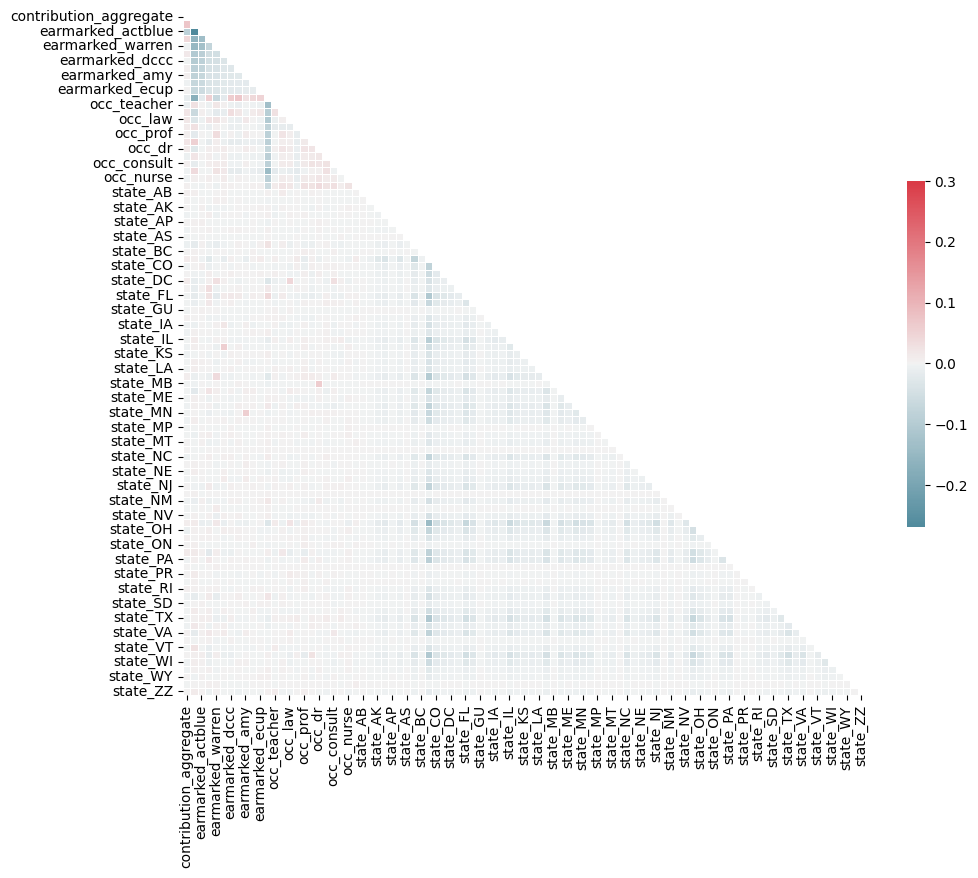

In [120]:
# Compute the correlation matrix
corr = final_data[[target] + features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [125]:
# create xgboost model

X = final_data[features]
y = final_data[target]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


model = xgb.XGBRegressor(
    n_estimators=1000,
    seed=123,
    objective="reg:squarederror",
    max_depth=10,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    n_jobs=-1,
    random_state=42,
)


model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=True)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


[0]	validation_0-rmse:247.73683
[1]	validation_0-rmse:247.06341
[2]	validation_0-rmse:246.64708
[3]	validation_0-rmse:246.30532
[4]	validation_0-rmse:245.94691
[5]	validation_0-rmse:245.60225
[6]	validation_0-rmse:245.41074
[7]	validation_0-rmse:245.18090
[8]	validation_0-rmse:244.99562


/Users/jason/Library/Caches/pypoetry/virtualenvs/segmentation-api-5BJpRvgo-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:244.87337
[10]	validation_0-rmse:244.75841
[11]	validation_0-rmse:244.65969
[12]	validation_0-rmse:244.62350
[13]	validation_0-rmse:244.58628
[14]	validation_0-rmse:244.56795
[15]	validation_0-rmse:244.49353
[16]	validation_0-rmse:244.45179
[17]	validation_0-rmse:244.44461
[18]	validation_0-rmse:244.46210
[19]	validation_0-rmse:244.44191
[20]	validation_0-rmse:244.46146
[21]	validation_0-rmse:244.47020
[22]	validation_0-rmse:244.45760
[23]	validation_0-rmse:244.44417
[24]	validation_0-rmse:244.46768
Mean Squared Error: 80845.71706209691


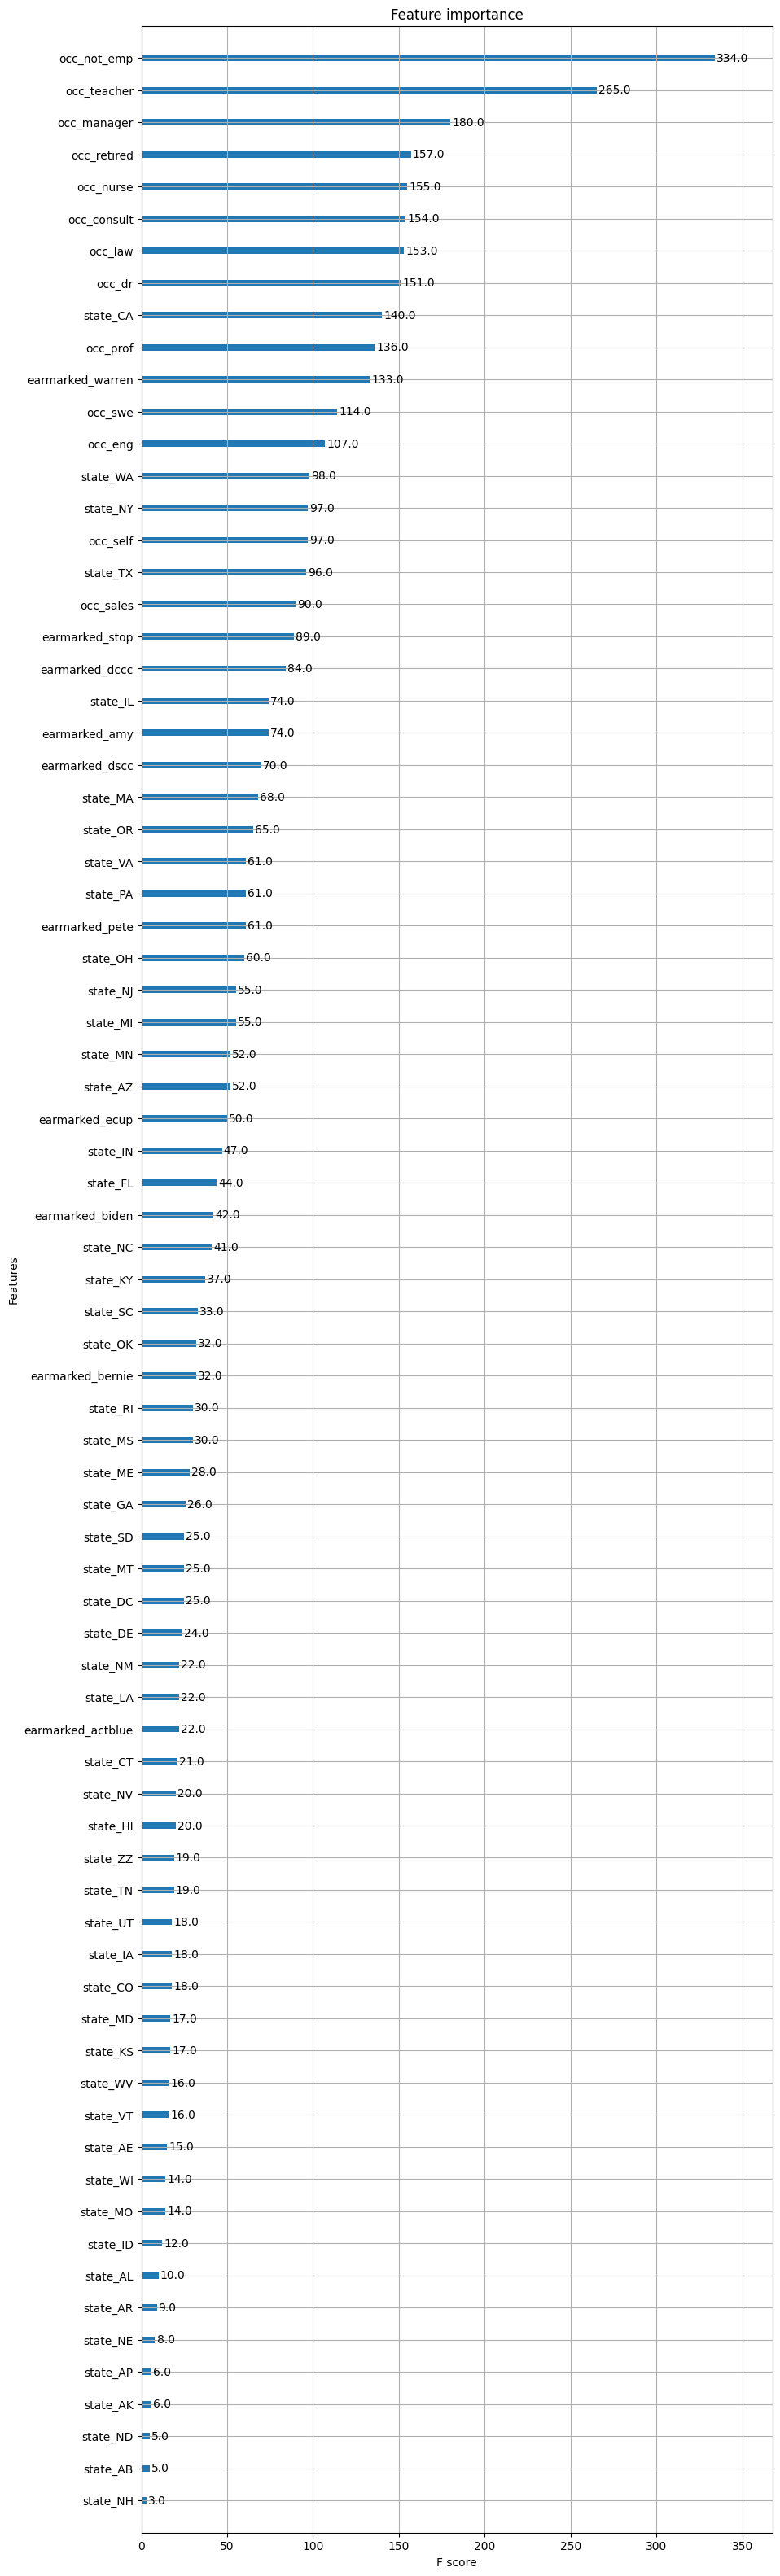

In [132]:
fig, ax = plt.subplots(figsize=(10, 40))
xgb.plot_importance(model, ax=ax)
plt.show()

In [134]:
# save model
joblib.dump(model, '../models/model.pkl')

['../models/model.pkl']

In [129]:
# build a linear model to predict contribution_aggregate
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

lm_y_pred = lm_model.predict(X_test)
lm_mse = mean_squared_error(y_test, lm_y_pred)

print(f'Mean Squared Error: {lm_mse}')

Mean Squared Error: 83270.77140216473


In [130]:
lm_y_pred

array([ 74.99225463, 159.90307141,  63.34757301, ...,  65.04711079,
        70.66703701,  92.20514155])

In [128]:
y_pred

array([ 72.14499 , 258.3263  ,  71.2509  , ...,  75.86119 , 106.59937 ,
        87.764656], dtype=float32)

In [131]:
y_test

23218     40.0
20731     44.0
39555     10.0
147506    10.0
314215    62.0
          ... 
168024    16.0
342937    60.0
316509    50.0
302334     2.5
360820    25.0
Name: contribution_aggregate, Length: 120000, dtype: float64